In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp

In [2]:
df=pd.read_csv('co2_world.txt')
dt=pd.read_csv('temp_glob')
df8=pd.read_csv('gas_serra.txt')
dt8=pd.read_csv('Dati_800kY.txt')

STUDIO I GRAFICI SU UNA SCALA DI 800°000 ANNI

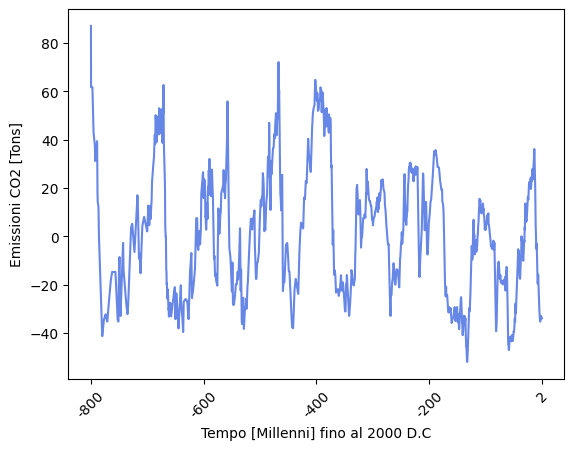

In [3]:
variaz_CO2_8=df8['CO2']-df8['CO2'].mean()
plt.plot(df8['Age'],variaz_CO2_8,color='#4169E1',alpha=0.8)
plt.xlabel('Tempo [Millenni] fino al 2000 D.C')
plt.ylabel('Emissioni CO2 [Tons]')
xtick_labels = ['-800', '-600', '-400', '-200', '2']
xtick_positions = [0, 200, 400, 600, 800]
plt.xticks(xtick_positions, xtick_labels, rotation=45)
print(' ')

-4.577593296475467

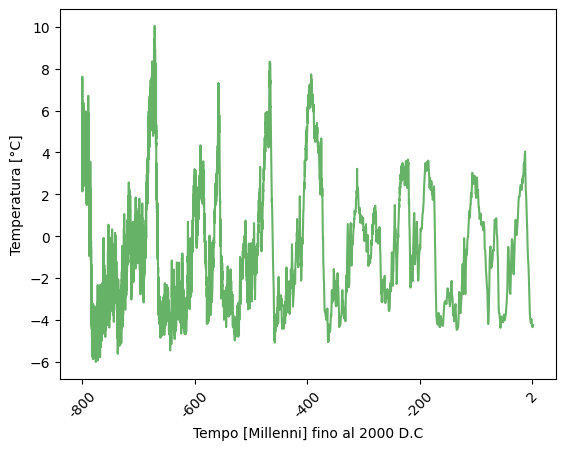

In [4]:
variaz_temp_8=dt8['Temperature']-dt8['Temperature'].mean()
plt.plot(dt8['Age']/1000,variaz_temp_8,color='#008000',alpha=0.6)
plt.xlabel('Tempo [Millenni] fino al 2000 D.C')
plt.ylabel('Temperatura [°C]')
xtick_labels = ['-800', '-600', '-400', '-200', '2']
xtick_positions = [0, 200, 400, 600, 800]
plt.xticks(xtick_positions, xtick_labels, rotation=45)
dt8['Temperature'].mean()

CONFRONTO TEMPERATURA E CO2 E TEST KOLMOGOROV-SMIRNOV

Ttest_indResult(statistic=5.6701096116308995e-14, pvalue=0.9999999999999547)


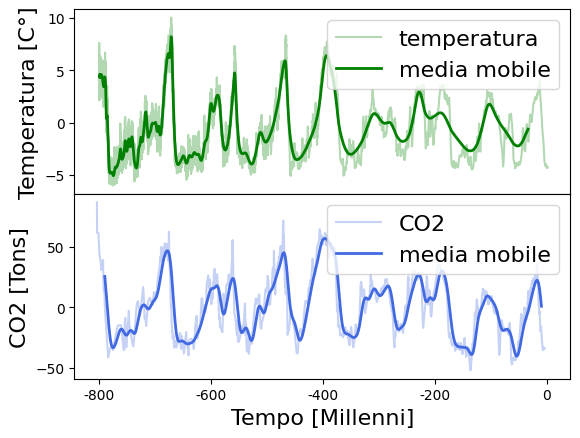

In [9]:
fig, axs = plt.subplots(2, 1, sharex=True)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot((dt8['Age'])/1000,variaz_temp_8,color='#008000',alpha=0.3,label='temperatura')
axs[0].plot(dt8['Age']/1000,variaz_temp_8.rolling(100, center=True, win_type='hamming').mean(),color='#008000',alpha=1,label='media mobile',lw=2)
axs[0].set_xlabel('Tempo [Millenni]',fontsize='16')
axs[0].set_ylabel('Temperatura [C°]',fontsize='16')
axs[0].legend(fontsize='16')

axs[1].plot(df8['Age']-4,variaz_CO2_8,color='#4169E1',label='CO2',alpha=0.3)
axs[1].plot(df8['Age'],variaz_CO2_8.rolling(100, center=True, win_type='hamming').mean(),color='#4169E1',alpha=1,label='media mobile',lw=2)
axs[1].set_xlabel('Tempo [Millenni]',fontsize='16')
axs[1].set_ylabel('CO2 [Tons]',fontsize='16')
xtick_labels = ['-800', '-600', '-400', '-200', '0']
xtick_positions = [0, 200, 400, 600, 800]
axs[1].legend(fontsize='16')
plt.xticks(xtick_positions, xtick_labels)
#print(ktest(variaz_CO2_8,variaz_temp_8))
print(stats.ttest_ind(variaz_CO2_8,variaz_temp_8, equal_var=False))
plt.savefig('co2_temp8_1.svg', format='svg')



ISTOGRAMMI

t-statistic = -6.774476159955206e-14
p-value = 0.9999999999999459
ks-statistic = 0.44939106446608806
ks-pvalue = 4.6e-321


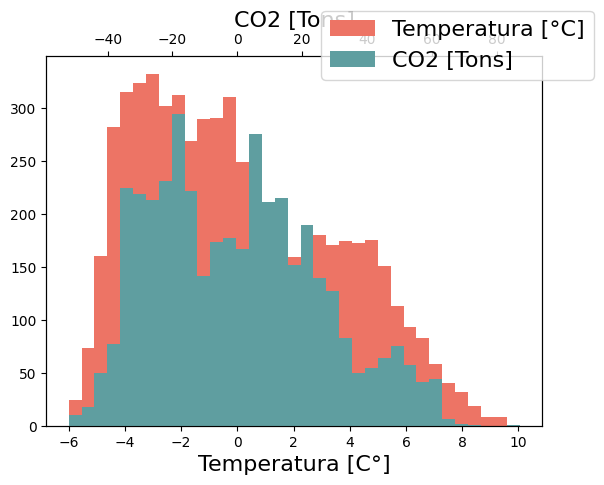

In [ ]:
fig, aw = plt.subplots()
aw1=aw.twiny()
aw1.hist(variaz_CO2_8,bins=35,color='#5F9EA0',label='CO2 [Tons]')
aw.hist(variaz_temp_8,bins=35,color='#ED7465',label='Temperatura [°C]')
aw1.set_xlabel('CO2 [Tons]',fontsize='16')
aw.set_xlabel('Temperatura [C°]',fontsize='16')
t_stat, p_val = ttest_ind(variaz_temp_8, variaz_CO2_8)
print("t-statistic =", t_stat)
print("p-value =", p_val)
statistic, pvalue = ks_2samp(variaz_CO2_8, variaz_temp_8)
print("ks-statistic =", statistic)
print("ks-pvalue =", pvalue)
fig.legend(loc='upper right',fontsize='16')
#aw1.legend(loc='upper left',fontsize='16')
plt.savefig('co2_temp8.svg', format='svg')
plt.show()

t-statistic = 0.3783874573337411
p-value = 0.7051542605019442


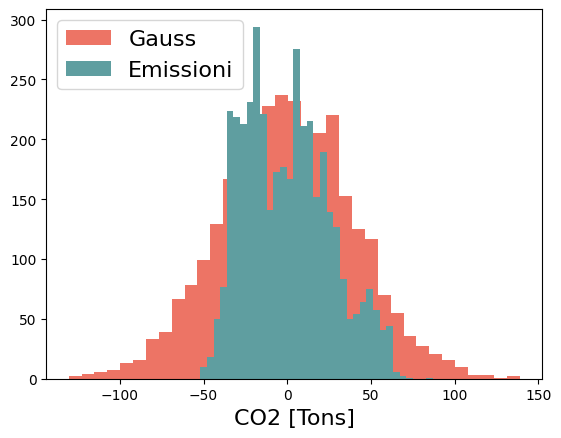

In [ ]:
gauss=np.random.normal(variaz_CO2_8.mean(),40,3000)
plt.hist(gauss,bins=35,color='#ED7465',label='Gauss')
plt.hist(variaz_CO2_8,bins=35,color='#5F9EA0',label='Emissioni')
plt.xlabel('CO2 [Tons]',fontsize='16')
t_stat, p_val = ttest_ind(gauss, variaz_CO2_8)
print("t-statistic =", t_stat)
print("p-value =", p_val)
plt.legend(loc='upper left',fontsize='16')
plt.show()

t-statistic tra dist CO2 e temp= 6.774476159955206e-14
p-value CO2-temp= 0.9999999999999459
t-statistic tra dist CO2 e gauss= 0.22574134306971494
p-value CO2-gauss= 0.8214080287792545
t-statistic tra dist gauss e temp= 0.13580451667232343
p-value gauss-temp= 0.8919784778629425


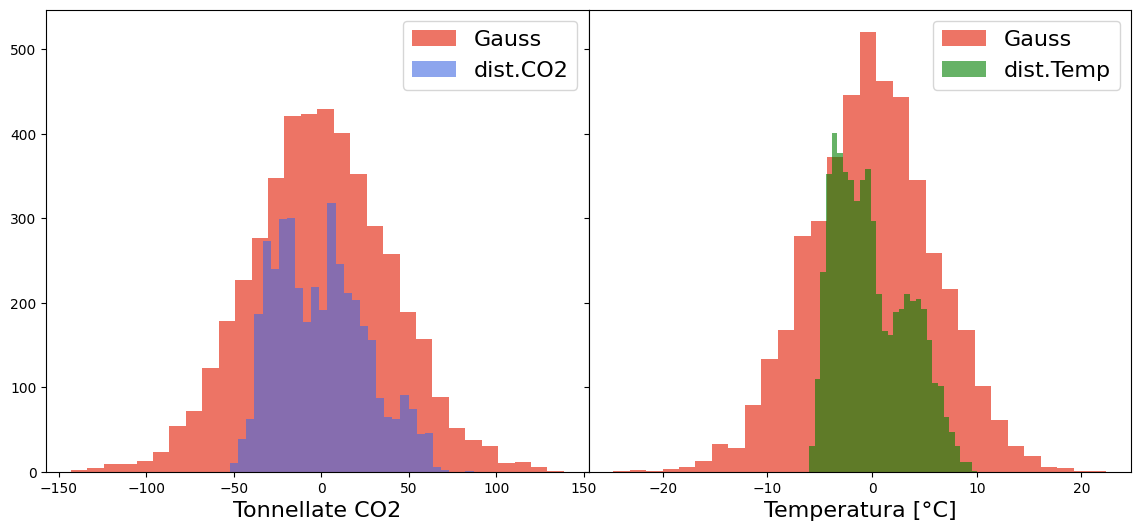

In [ ]:
fig, ist = plt.subplots(1,2,figsize=(14,6),sharey='row')
fig.subplots_adjust(wspace=0)

gauss1=np.random.normal(variaz_CO2_8.mean(),40,4500)
gauss2=np.random.normal(variaz_temp_8.mean(),6,4500)

ist[0].hist(gauss1,bins=30,color='#ED7465',label='Gauss')
ist[1].hist(gauss2,bins=30,color='#ED7465',label='Gauss')
ist[0].hist(variaz_CO2_8,bins=30,color='#4169E1',alpha=0.6,label='dist.CO2')
ist[1].hist(variaz_temp_8,bins=30,color='#008000',alpha=0.6,label='dist.Temp')
ist[0].set_xlabel('Tonnellate CO2',fontsize='16')
ist[1].set_xlabel('Temperatura [°C]',fontsize='16')
t_stat, p_val = ttest_ind(variaz_CO2_8,variaz_temp_8)
print("t-statistic tra dist CO2 e temp=", t_stat)
print("p-value CO2-temp=", p_val)
ist[0].legend(fontsize='16')
ist[1].legend(fontsize='16')
t_stat, p_val = ttest_ind(variaz_CO2_8,gauss1)
print("t-statistic tra dist CO2 e gauss=", t_stat)
print("p-value CO2-gauss=", p_val)
t_stat, p_val = ttest_ind(gauss2,variaz_temp_8)
print("t-statistic tra dist gauss e temp=", t_stat)
print("p-value gauss-temp=", p_val)
plt.savefig('hist_8.svg', format='svg')
plt.show()

STUDIO I GRAFICI DAL 1900-2020

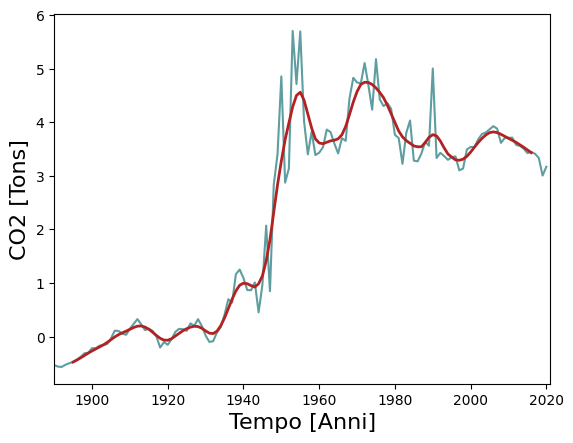

In [ ]:
#raggruppiamo le emissioni di CO2 per anno e le sommiamo tra loro
appoggio = df.groupby('Year')['Emission_CO2'].mean()  
emissioni_per_anno=appoggio.iloc[96:]-appoggio.iloc[list(range(96,145))].mean()
anni = list(range(1890, 2021))
#creiamo un grafico delle emissioni totali in funzione degli anni
plt.plot(anni,emissioni_per_anno,color='#5F9EA0')
plt.plot(anni,emissioni_per_anno.rolling(10, center=True, win_type='hamming').mean(), color='#b22222', label='rolled data',lw=2)
cumulative_sum = np.cumsum(emissioni_per_anno)
#plt.plot(anni,cumulative_sum)
plt.xlim(1890,2021)
plt.xlabel('Tempo [Anni]',fontsize='16')
plt.ylabel('CO2 [Tons]',fontsize='16')
plt.savefig('co2_temp8_2.svg', format='svg')


grafico della temperatura 1900-2020

Text(0, 0.5, 'temperatura [C°]')

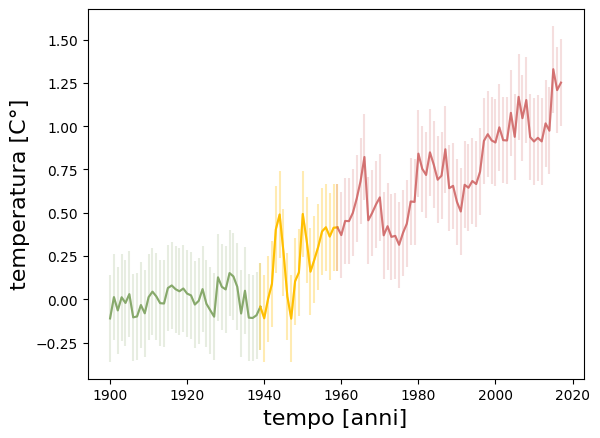

In [ ]:
x=dt['YEAR']
y=dt['TEMP']
x1=dt['YEAR'].iloc[list(range(0,40))]
y1=dt['TEMP'].iloc[list(range(0,40))]-dt['TEMP'].iloc[list(range(0,40))].mean()
x2=dt['YEAR'].iloc[list(range(39,60))]
y2=dt['TEMP'].iloc[list(range(39,60))]-dt['TEMP'].iloc[list(range(0,40))].mean()
x3=dt['YEAR'].iloc[list(range(59,118))]
y3=dt['TEMP'].iloc[list(range(59,118))]-dt['TEMP'].iloc[list(range(0,40))].mean()

y_err=0.25
plt.plot(x1,y1,color='#87A96B',label='variaz temperatura media')
plt.errorbar(x1, y1, yerr=y_err, color='#87A96B',alpha=0.2)
plt.plot(x2,y2,color='#FFBF00',label='variaz temperatura media')
plt.errorbar(x2, y2, yerr=y_err, color='#FFBF00',alpha=0.3)
plt.plot(x3,y3,color='#CD5C5C',alpha=0.8,label='variaz temperatura media')
plt.errorbar(x3, y3, yerr=y_err, color='#CD5C5C',alpha=0.2)
#plt.plot(x,y.rolling(10, center=True, win_type='hamming').mean(), color='#4B0082', label='rolled data',lw=2)
plt.xlabel('tempo [anni]',fontsize='16')
plt.ylabel('temperatura [C°]',fontsize='16')

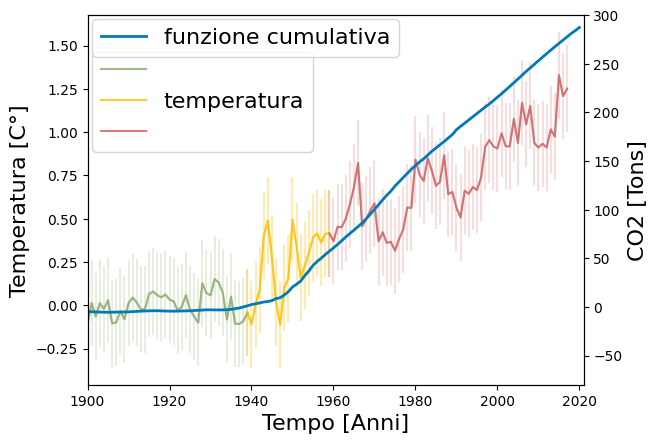

In [ ]:
# Creazione dei sottografici e degli oggetti assegnati
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#ax3 = ax1.twiny()
#ax4 = ax1.twiny()

# Grafico della prima curva su ax1dt['TEMP'].iloc[list(range(0,51))].mean()
ax1.plot(x1,y1,color='#87A96B',alpha=0.8,label=' ')
ax1.errorbar(x1, y1, yerr=y_err, color='#87A96B',alpha=0.2)
ax1.plot(x2,y2,color='#FFBF00',alpha=0.8,label='temperatura')
ax1.errorbar(x2, y2, yerr=y_err, color='#FFBF00',alpha=0.3)
ax1.plot(x3,y3,color='#CD5C5C',alpha=0.8,label=' ')
ax1.errorbar(x3, y3, yerr=y_err, color='#CD5C5C',alpha=0.2)
ax1.set_xlabel('tempo [anno]',fontsize='16')
ax1.set_ylabel('temperatura [C°]',fontsize='16')


# Grafico della seconda curva su ax2
ax2.tick_params(axis='y', labelcolor='red')
ax2.plot(anni,cumulative_sum,color='#007BB8',label='funzione cumulativa',lw=2)
#ax2.set_xlim(1900,2021)
ax2.set_xlabel('Anno',fontsize='16')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylabel('Emissioni di CO2 totali (tonnellate)',fontsize='16')

# Settaggio dell'asse x inferiore su ax1
ax1.set_xlabel('Tempo [Anni]', color='black',fontsize='16')
ax1.set_xlim(1900,2021)
ax1.tick_params(axis='x', labelcolor='black')

# Settaggio dell'asse y a destra su ax2
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
ax2.spines['right'].set_position(('axes', 1))
ax2.set_ylim(-80,300)
ax2.set_ylabel('CO2 [Tons]', color='black',fontsize='16')
ax2.tick_params(axis='y', labelcolor='black')



# Settaggio dell'asse y a sinistra su ax1
ax1.set_ylabel('Temperatura [C°]', color='black',fontsize='16')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left',bbox_to_anchor=(0.01, 0.90), borderaxespad=0.,fontsize='16')
ax2.legend(loc='upper left',bbox_to_anchor=(0.01, 0.99), borderaxespad=0.,fontsize='16')
plt.savefig('co2_temp8_3.svg',format='svg')

FACCIO MODELLO NULLO CONDISTRUBUZIONE GAUSSIANA ATTORNO ALLA MEDIA PRIMA DEL PICCO CON DEV STANDARD MASSIMA IN TUTTO IL GRAFICO ESCLUSO QUEL SALTO ENORME



t-statistic = -9.352403072508956
p-value = 8.118693007225418e-18


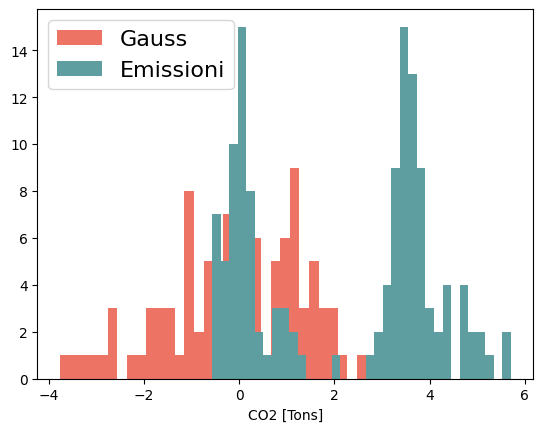

In [ ]:
fig, fg = plt.subplots()
gauss=np.random.normal(emissioni_per_anno.head(40).mean(),1.5,100)
plt.hist(gauss,bins=35,color='#ED7465',label='Gauss')
plt.hist(emissioni_per_anno,bins=35,color='#5F9EA0',label='Emissioni')
plt.xlabel('CO2 [Tons]')
t_stat, p_val = ttest_ind(gauss, emissioni_per_anno)
print("t-statistic =", t_stat)
print("p-value =", p_val)
plt.legend(fontsize='16')
plt.savefig('co2_temp8_3.svg',format='svg')
plt.show()

t-statistic = -9.033090294609709
p-value = 9.533016012874786e-17


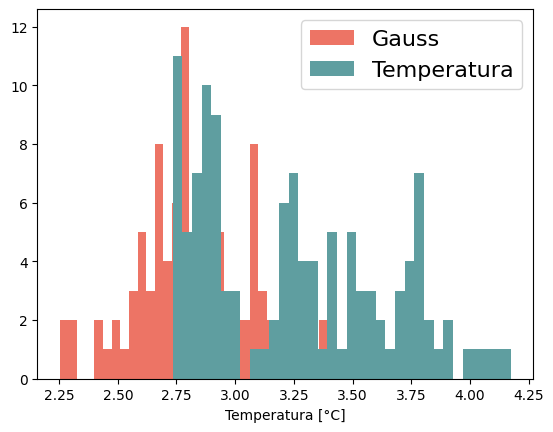

In [ ]:
gaussa=np.random.normal(y.head(40).mean(),0.25,100)
plt.hist(gaussa,bins=35,color='#ED7465',label='Gauss')
plt.hist(y,bins=35,color='#5F9EA0',label='Temperatura')
plt.xlabel('Temperatura [°C]')
t_stat, p_val = ttest_ind(gaussa, y)
print("t-statistic =", t_stat)
print("p-value =", p_val)
plt.legend(fontsize='16')

plt.show()

FORSE MEGLIO STUDIARE LE VARIAZIONI
2 uniformi dal 1900 ad ora
prima è strano

STUDIO BOXPLOT

Cambiamenti nel processo generatore dei dati: Il cambiamento delle fluttuazioni può suggerire un cambiamento nel processo generatore dei dati.
Tendenze future: Il cambiamento delle fluttuazioni può indicare tendenze future dei dati.

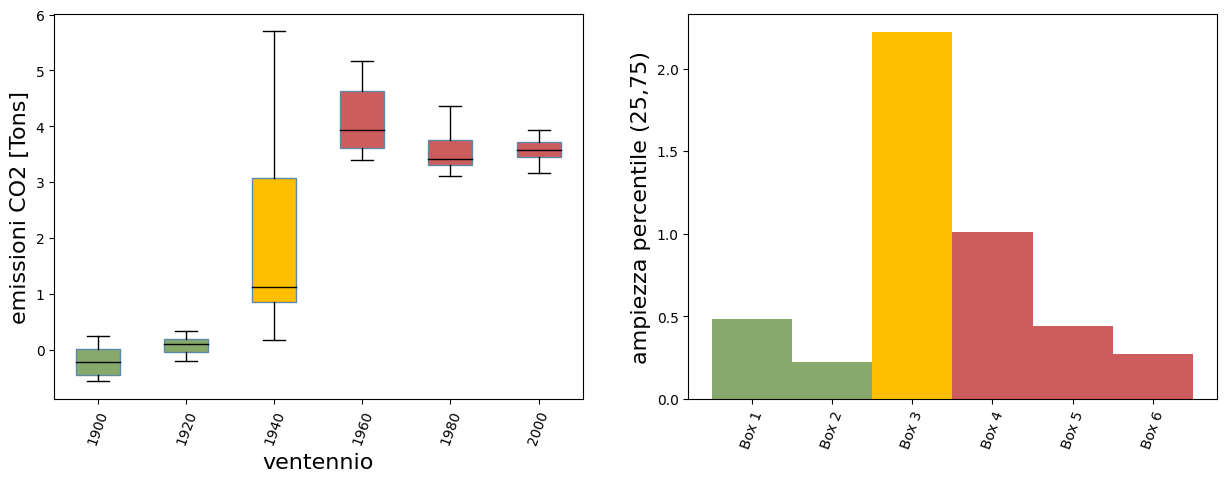

In [ ]:
a=emissioni_per_anno
c = [1,2,3,4,5,6]
subsets = [a[i:i+22] for i in range(0, len(a), 22)]
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
box=ax[0].boxplot(subsets,whiskerprops=dict(color='black'), medianprops=dict(color='black'), patch_artist=True,showfliers=False)
plt.setp(box['boxes'], color='#5D8AA8')
ax[0].set_xlabel('ventennio',fontsize='16')
ax[0].set_ylabel('emissioni CO2 [Tons]',fontsize='16')
etichette = ['1900', '1920', '1940','1960', '1980', '2000']
ax[0].set_xticks(c,etichette,rotation=70)

box_colors = ['#87A96B', '#87A96B','#FFBF00','#CD5C5C','#CD5C5C','#CD5C5C']
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)


percentiles = [np.percentile(d, [25, 50, 75]) for d in subsets]
percentile_lengths = [(p[2]-p[0]) for p in percentiles]
x_indexes = np.arange(len(percentile_lengths))
ax[1].set_ylabel('ampiezza percentile (25,75)',fontsize='16')
ax[1].bar(x_indexes, percentile_lengths, width=1, color=box_colors)
ax[1].set_xticks(x_indexes,etichette,rotation=70)
ax[1].set_xticklabels([f'Box {i+1}' for i in range(len(percentile_lengths))])
plt.savefig('fig_temp2.pdf', format='pdf')


Chi quadrato = 0.2834
coeff_pearson:  0.9416611863942853


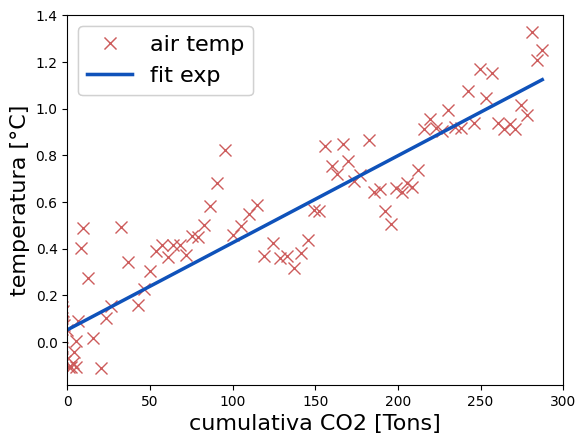

In [ ]:
def linear_func(xn, an, bn):
    return an*xn + bn
yv=y-dt['TEMP'].iloc[list(range(0,40))].mean()
popt, pcov = curve_fit(linear_func, cumulative_sum.iloc[13:], yv)
plt.plot(cumulative_sum.iloc[13:],yv,linestyle="", label='air temp', marker='x',color='#CD5C5C',markersize=8)
plt.plot(cumulative_sum.iloc[13:], linear_func(cumulative_sum.iloc[13:],*popt), label='fit exp',color='#0F52BA',lw=2.5)
#plt.yscale("log")
plt.xlim(0,300)
plt.xlabel('cumulativa CO2 [Tons]',fontsize='16')
plt.ylabel('temperatura [°C]',fontsize='16')
yfit = linear_func(yv, *popt)
residuals = yv - yfit
chi_squared = np.sum(residuals**2) / (len(yv) - 2)
print("Chi quadrato =",'{:.4f}'.format(chi_squared))
chi_square= stats.chisquare(yv)
corr = np.corrcoef(cumulative_sum.iloc[13:], yv)[0, 1]
print('coeff_pearson: ',corr)
leg1 = plt.legend(fontsize='16')
plt.gca().add_artist(leg1) 
plt.savefig('reg_lin1900.svg', format='svg')

In [ ]:
from scipy.stats import linregress
from scipy.interpolate import interp1d

# definisci i dati 
arr_sorted = np.sort(variaz_temp_8)
temp_interp = interp1d((dt8['Age'][1:])/1000, dt8['Temperature'][1:])(df8['Age'][1:])
variaz_temp_interp=temp_interp-dt8['Temperature'].mean()
# calcola i coefficienti della retta di regressione
m, b = np.polyfit(variaz_temp_interp,variaz_CO2_8[1:], 1)

# calcola il chi quadro del fit
y_fit = m * variaz_CO2_8[1:] + b
chi_sq = np.sum((variaz_temp_interp - y_fit)**2 / y_fit)

# calcola la correlazione dei dati

corr = np.correlate(variaz_CO2_8, variaz_temp_interp, mode='full')
norm_corr = corr / np.linalg.norm(corr)
lag = np.argmax(corr) - len(x) + 1
# stampa i coefficienti, il chi quadro e la correlazione
print("Coefficiente angolare:", m)
print("Intercetta:", b)
print("Chi quadro:", chi_sq)
print("Correlazione incoricata:", norm_corr)

# crea il grafico con i dati e la retta di regressione
#plt.scatter(variaz_CO2_8[1:], variaz_temp_interp)
#plt.plot(variaz_temp_interp, m*variaz_CO2_8[1:] + b, color="red")
print("Lo sfasamento tra le due serie è di", np.argmax(corr), "unità di tempo.")
plt.show()



Coefficiente angolare: 7.8381431824299925
Intercetta: 5.717411648310765
Chi quadro: 28060.890846688275
Correlazione incoricata: [-8.80202334e-05 -1.50271752e-04 -2.12417078e-04 ... -1.00938401e-04
 -7.15266298e-05 -3.79446267e-05]
Lo sfasamento tra le due serie è di 3996 unità di tempo.


STUDIARE DINAMICA ASSUMENTO CHE PRIMA DI UNA CERTA DATA (1850-1900) LA SOMMA CUMULATIVA DOVREBBE ESSERE COSTANTE PERCHÈ PARTE DELLA CO2 VIENE RIASSORBITA DALLA TERRA
(SISTEMA SMORZATO?)

Sì, l'integrale delle emissioni rappresenta la funzione cumulativa delle emissioni. La funzione cumulativa di una distribuzione di probabilità cumulativa (CDF) rappresenta la probabilità che la variabile casuale associata assuma un valore inferiore o uguale ad un certo valore x.

Nel caso delle emissioni, la funzione cumulativa rappresenta la quantità totale di emissioni cumulative fino ad un certo punto nel tempo. Questo valore è ottenuto sommando le emissioni di ogni anno a partire dall'anno iniziale fino all'anno di interesse. Quindi, la funzione cumulativa delle emissioni può essere calcolata come l'integrale della funzione delle emissioni.

Ad esempio, se la funzione delle emissioni è rappresentata da un insieme di punti (x, y) dove x è l'anno e y è la quantità di emissioni, la funzione cumulativa delle emissioni può essere calcolata utilizzando il metodo della trapezoidale per approssimare l'integrale della funzione.


STUDIARE DINAMICA NON CON LA MEDIA CUMULATIVA MA CON LA TEMPERATURA E BASTA (INTEGRALE?) 
C'È DELL'INERZIA NEL MOTO

array([-376.17298829, -642.21795234, -907.80907874, ..., -431.38149707,
       -305.68410274, -162.16434646])

Text(0, 0.5, 'temperatura [C°]')

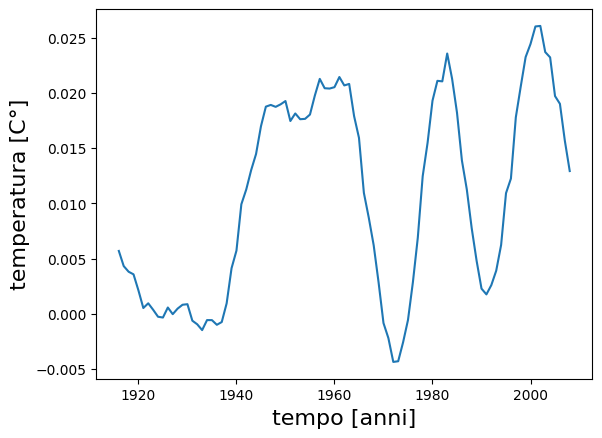

In [ ]:
dy_dx = np.diff(y.rolling(25, center=True, win_type='hamming').mean()) / np.diff(x.rolling(25,center=True,win_type='hamming').mean())

y_err=0.25
#plt.plot(x1,y1,color='#87A96B',label='variaz temperatura media')
#plt.errorbar(x1, y1, yerr=y_err, color='#87A96B',alpha=0.2)
#plt.plot(x2,y2,color='#FFBF00',label='variaz temperatura media')
#plt.errorbar(x2, y2, yerr=y_err, color='#FFBF00',alpha=0.3)
#plt.plot(x3,y3,color='#CD5C5C',alpha=0.8,label='variaz temperatura media')
#plt.errorbar(x3, y3, yerr=y_err, color='#CD5C5C',alpha=0.2)
plt.plot(anni[14:],dy_dx)
var_em=(emissioni_per_anno-emissioni_per_anno.min())/(emissioni_per_anno.max()-emissioni_per_anno.min())
#plt.plot(anni,var_em)
#plt.plot(y)
#plt.plot(x,y.rolling(10, center=True, win_type='hamming').mean(), color='#4B0082', label='rolled data',lw=2)
plt.xlabel('tempo [anni]',fontsize='16')
plt.ylabel('temperatura [C°]',fontsize='16')

t-statistic tra dist gauss e temp= 0.13580451667232343
p-value gauss-temp= 0.8919784778629425


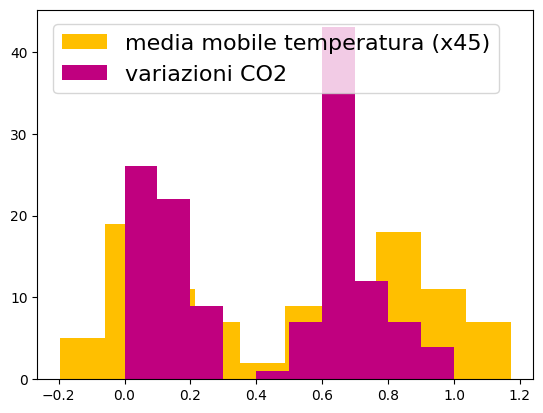

In [ ]:

plt.hist(dy_dx*45,color='#FFBF00',label='media mobile temperatura (x45)')
plt.hist(var_em,color='#C0007F',label='variazioni CO2')
plt.legend(loc='upper left',bbox_to_anchor=(0.01, 0.99),fontsize='16')
t_stat, p_val = ttest_ind(gauss2,variaz_temp_8)
print("t-statistic tra dist gauss e temp=", t_stat)
print("p-value gauss-temp=", p_val)
plt.savefig('dist1900.svg', format='svg')
